In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:

# Target Search Term
target_terms = ("cityofphoenixaz", "cityofmesa", "scottsdaleaz","cityofchandler", "tempegov", "glendaleaz", "gilbertaz")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    #print(sentiment)
    #print()
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

In [3]:
target_df = pd.DataFrame(results_list).round(3)
target_df


,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.190,0.880,0.025,0.095,68,cityofphoenixaz
1,0.355,0.823,0.022,0.155,52,cityofmesa
2,0.310,0.840,0.018,0.142,38,scottsdaleaz
3,0.457,0.783,0.022,0.196,52,cityofchandler
4,0.447,0.745,0.049,0.205,53,tempegov
5,0.372,0.788,0.030,0.181,47,glendaleaz
6,0.339,0.847,0.010,0.143,48,gilbertaz


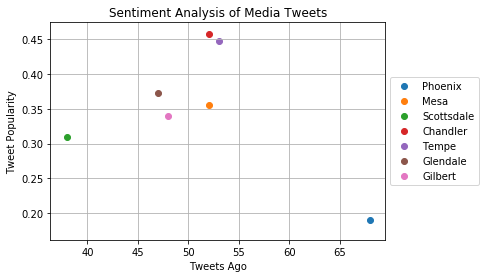

<Figure size 432x288 with 0 Axes>

In [4]:
# Create dataframe for each news source and plot
phoenix_comp_df = target_df.loc[target_df["User"] == 'cityofphoenixaz']
plt.scatter(phoenix_comp_df['Tweet Count'], phoenix_comp_df['Compound'], label='Phoenix')

mesa_comp_df = target_df.loc[target_df["User"] == 'cityofmesa']
plt.scatter(mesa_comp_df['Tweet Count'], mesa_comp_df['Compound'], label='Mesa')

scott_comp_df = target_df.loc[target_df["User"] == 'scottsdaleaz']
plt.scatter(scott_comp_df['Tweet Count'], scott_comp_df['Compound'], label='Scottsdale')

chand_comp_df = target_df.loc[target_df["User"] == 'cityofchandler']
plt.scatter(chand_comp_df['Tweet Count'], chand_comp_df['Compound'], label='Chandler')

tempe_comp_df = target_df.loc[target_df["User"] == 'tempegov']
plt.scatter(tempe_comp_df['Tweet Count'], tempe_comp_df['Compound'], label='Tempe')

glend_comp_df = target_df.loc[target_df["User"] == 'glendaleaz']
plt.scatter(glend_comp_df['Tweet Count'], glend_comp_df['Compound'], label='Glendale')
                                                                                                     
gilb_comp_df = target_df.loc[target_df["User"] == 'gilbertaz']
plt.scatter(gilb_comp_df['Tweet Count'], gilb_comp_df['Compound'], label='Gilbert')

plt.title(f'Sentiment Analysis of Media Tweets')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()
plt.savefig("Sentiment_Analysis_of Media_Tweets_scatter") 


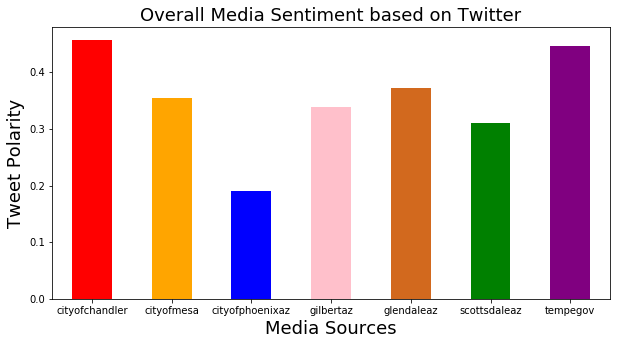

In [5]:
city_stats = target_df.groupby("User")["Compound"].mean()
city_stats

#Plot of overall Media Sentiment Analysis
plt.figure(figsize=(10,5))
city_stats.plot(kind='bar',color=['red', 'orange', 'blue', 'pink', 'chocolate', 'green', 'purple'])

plt.ylabel('Tweet Polarity',fontsize='18')
plt.xlabel('Media Sources',fontsize='18')
plt.xticks(rotation=0)
plt.title('Overall Media Sentiment based on Twitter',fontsize=(18));
plt.savefig("Overall_Media_Sentiment_based_on_Twitter_barchart")  